In [1]:
### Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#### load the Forbes Richest Athletes (Forbes Richest Athletes 1990-2020) dataset and create the dataframe

athletes_df = pd.read_csv("datasets/Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv")
athletes_df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [3]:
## Data inspection and cleansing

In [4]:
# Check the columns 
athletes_df.columns

Index(['S.NO', 'Name', 'Nationality', 'Current Rank', 'Previous Year Rank',
       'Sport', 'Year', 'earnings ($ million)'],
      dtype='object')

In [5]:
# Check how many rows and columns 
row_num = athletes_df.shape[0]
col_num = athletes_df.shape[1]

print(f"There are {row_num} rows and {col_num} columns")

There are 301 rows and 8 columns


In [6]:
# Check if any duplicated rows in the dataframe 

# Create a dataframe of duplicated rows 
duplicated_rows = athletes_df[athletes_df.duplicated()]

# Print dataframe duplicates if there are any 
if not duplicated_rows.empty:
    print(duplicated_rows)
else: 
    print("There are no duplicated rows in dataframe!")

There are no duplicated rows in dataframe!


In [7]:
# Check for missing (NaN) values in the dataframe
missing_values_count = athletes_df.isnull().sum()
missing_values_count

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

In [8]:
# The 'Previous Year Rank' is missing 24 values. These NaN values are Missing at Random (MAR)
# The missing data can be explained as those that were not on the list in the previous year 
# would not have a previous year rank and those where the year was 1990 would not 
# have a previous year rank as this would be outside of the range of the dataset 

# This column will be dropped from the analysis to simplify the visualisations as there
# is not way to impute this data based on inferences from other values in the data 

# Drop specified columns 
athletes_df.drop(['Previous Year Rank'], axis=1, inplace=True)

In [9]:
# Reheck for missing (NaN) values in the dataframe
missing_values_count = athletes_df.isnull().sum()
missing_values_count

S.NO                    0
Name                    0
Nationality             0
Current Rank            0
Sport                   0
Year                    0
earnings ($ million)    0
dtype: int64

In [10]:
# Check unique values in columns 

In [11]:
unique_names = athletes_df['Name'].unique()
unique_names.sort()
unique_names

array(['Aaron Rodgers', 'Aaron Rogers', 'Alain Prost', 'Alex Rodriguez',
       'Andre Agassi', 'Andrew Luck', 'Arnold Palmer', 'Ayrton Senna',
       'Buster Douglas', 'Cam Newton', 'Canelo Alvarez', 'Carson Wentz',
       'Cecil Fielder', 'Conor McGregor', 'Cristiano Ronaldo',
       'Dale Earnhardt', 'Dale Earnhardt Jr.', 'David Beckham',
       'Deion Sanders', 'Dennis Rodman', 'Donovan "Razor" Ruddock',
       'Drew Brees', 'Eli Manning', 'Emmit Smith', 'Evander Holyfield',
       'Floyd Mayweather', 'Gary Sheffield', 'George Foreman',
       'Gerhard Berger', 'Grant Hill', 'Greg Norman', 'Jack Nicklaus',
       'Jacques Villeneuve', 'James Harden', 'Jeff Gordon', 'Jim Courier',
       'Joe Montana', 'Joe Sakic', 'Jordan Spieth', 'Kevin Durant',
       'Kevin Garnett', 'Kimi Raikkonen', 'Kirk Cousins', 'Kobe Bryant',
       'Lance Armstrong', 'LeBron James', 'Lennox Lewis',
       'Lewis Hamilton', 'Lionel Messi', 'Manny Pacquiao', 'Matt Ryan',
       'Matthew Stafford', 'Michael 

In [12]:
unique_nationality = athletes_df['Nationality'].unique()
unique_nationality.sort()
unique_nationality

array(['Argentina', 'Australia', 'Austria', 'Brazil', 'Canada',
       'Dominican', 'Filipino', 'Finland', 'France', 'Germany', 'Ireland',
       'Italy', 'Mexico', 'Northern Ireland', 'Philippines', 'Portugal',
       'Russia', 'Serbia', 'Spain', 'Switzerland', 'UK', 'USA'],
      dtype=object)

In [13]:
# Sport column has lots of incorrectly entered data 
unique_sports = athletes_df['Sport'].unique()
unique_sports.sort()
unique_sports

array(['American Football', 'American Football / Baseball', 'Auto Racing',
       'Auto Racing (Nascar)', 'Auto racing', 'Baseball', 'Basketball',
       'Boxing', 'F1 Motorsports', 'F1 racing', 'Golf', 'Hockey',
       'Ice Hockey', 'MMA', 'NASCAR', 'NBA', 'NFL', 'Soccer', 'Tennis',
       'auto racing', 'baseball', 'basketball', 'boxing', 'cycling',
       'golf', 'ice hockey', 'motorcycle gp', 'soccer', 'tennis'],
      dtype=object)

In [14]:
# Convert all entries to lower case 
athletes_df['Sport'] = athletes_df['Sport'].str.lower()

In [15]:
def change_sport_entries(df, column, list_of_sports_to_change, string_to_change_to):
    
    # Get the rows of all the sports that need to be changed
    rows_to_be_changed = df[column].isin(list_of_sports_to_change)
    
    # Replace all rows with the string that was specified on calling the function 
    df.loc[rows_to_be_changed, column] = string_to_change_to
    
    print("Sport changed!")

In [16]:
# Change auto racing related entries - all racing has been entered as 'auto racing'
change_sport_entries(df=athletes_df, column="Sport", 
                     list_of_sports_to_change=['auto racing (nascar)', 'f1 motorsports', 'f1 racing', 'nascar'], 
                     string_to_change_to='auto racing')

Sport changed!


In [17]:
# Change basketball related entries - all basketball has been entered as 'basketball'
change_sport_entries(df=athletes_df, column="Sport", 
                     list_of_sports_to_change=['nba'], 
                     string_to_change_to='basketball')

Sport changed!


In [18]:
# Change ice hockey related entries - all hockey has been entered as 'ice hockey'
change_sport_entries(df=athletes_df, column="Sport", 
                     list_of_sports_to_change=['hockey'], 
                     string_to_change_to='ice hockey')

Sport changed!


In [19]:
# Change american football related entries - all american football has been entered as 'american football'
change_sport_entries(df=athletes_df, column="Sport", 
                     list_of_sports_to_change=['nfl'], 
                     string_to_change_to='american football')

Sport changed!


In [20]:
# Analysis of the Sport also shows that there is some data entered that can fit into 2 categories 
unique_sports = athletes_df['Sport'].unique()
unique_sports.sort()
unique_sports

array(['american football', 'american football / baseball', 'auto racing',
       'baseball', 'basketball', 'boxing', 'cycling', 'golf',
       'ice hockey', 'mma', 'motorcycle gp', 'soccer', 'tennis'],
      dtype=object)

In [24]:
# Filtering the dataframe shows that there is just one athlete 
# Deion Sanders played both american football and baseball in 1995 
# For the purposes of this analysis, as it is just one data entry, 
# he will be dropped from the analysis. However, one approach could 
# be to enter him twice on the list. Seperately for american football
# and baseball (although this would affect the earnings ($ million) column too)
filtered_df = athletes_df[athletes_df['Sport'] == 'american football / baseball']
filtered_df

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
52,53,Deion Sanders,USA,3,american football / baseball,1995,22.5


In [25]:
athletes_df.drop(52, axis=0, inplace=True)

In [26]:
athletes_df.head()

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,boxing,1990,28.6
1,2,Buster Douglas,USA,2,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,auto racing,1990,10.0
4,5,Alain Prost,France,5,auto racing,1990,9.0


In [28]:
# Check how many rows and columns at the end of data cleaning 
row_num = athletes_df.shape[0]
col_num = athletes_df.shape[1]

print(f"There are {row_num} rows and {col_num} columns")

There are 300 rows and 7 columns


In [29]:
# Exploratory Data Analysis

In [31]:
# 1. Which athletes have made the most money from 1990-2020? 

# Group athletes by name 
athlete_groupby = athletes_df.groupby(by=['Name'])

# Calculate the total earnings of the athletes 
total_earnings = athlete_groupby.sum(numeric_only=True).drop(columns=['S.NO', 'Current Rank', 'Year'])

sorted_total_earnings = total_earnings.sort_values('earnings ($ million)', ascending=False)

total_earnings_series = sorted_total_earnings['earnings ($ million)']


# Create a dataframe from the data 
total_earnings_df =  pd.DataFrame({"Athlete name": total_earnings_series.index, "Total earnings": total_earnings_series.values})


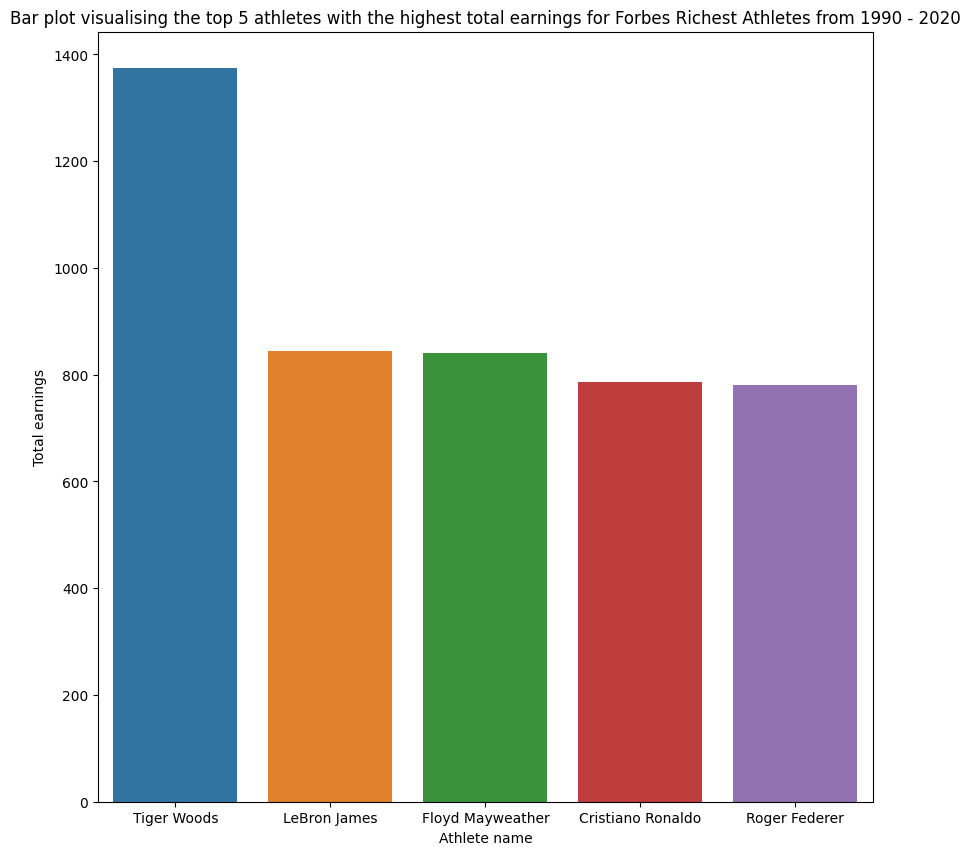

In [32]:
# Visualise the provinces with the top 5 highest points 
plt.figure(figsize=(10,10))
plt.title("Bar plot visualising the top 5 athletes with the highest total earnings for Forbes Richest Athletes from 1990 - 2020")

sns.barplot(data=total_earnings_df.head(5), x="Athlete name", y="Total earnings")

plt.show()

In [33]:
# Tiger woods has made the most money total from 1990 - 2020

In [34]:
# 2. Which athlete made the most money in a year from 1990 - 2020? 
sorted_max_earnings = athletes_df.sort_values('earnings ($ million)', ascending=False)

sorted_max_earnings.head(1)

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
241,242,Floyd Mayweather,USA,1,boxing,2015,300.0


In [65]:
sorted_max_earnings[sorted_max_earnings["Year"] == 2015]

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
241,242,Floyd Mayweather,USA,1,boxing,2015,300.0
242,243,Manny Pacquiao,Philippines,2,boxing,2015,160.0
243,244,Cristiano Ronaldo,Portugal,3,soccer,2015,79.6
244,245,Lionel Messi,Argentina,4,soccer,2015,73.8
245,246,Roger Federer,Switzerland,5,tennis,2015,67.0
246,247,LeBron James,USA,6,basketball,2015,64.8
247,248,Kevin Durant,USA,7,basketball,2015,54.2
248,249,Phil Mickelson,USA,8,golf,2015,50.8
249,250,Tiger Woods,USA,9,golf,2015,50.6
250,251,Kobe Bryant,USA,10,basketball,2015,49.5


In [35]:
# Floyd Mayweather made the most money in a year in 2015 when he earned $300 million by Boxing

In [39]:
# 3. Which sport leads to the most earnings on average from 1990 - 2020?

groupby_sport = athletes_df.groupby(by=['Sport'])

sport_earnings_avg = groupby_sport.mean(numeric_only=True).drop(columns=['S.NO', 'Current Rank', 'Year'])

sorted_sport_earnings_avg = sport_earnings_avg.sort_values('earnings ($ million)', ascending=False)

sport_earnings_series = sorted_sport_earnings_avg['earnings ($ million)']

# Create a dataframe from the data 
sport_earnings_df =  pd.DataFrame({"Sport": sport_earnings_series.index, "Average earnings": sport_earnings_series.values})


In [40]:
sport_earnings_avg

,earnings ($ million)
Sport,
american football,46.935000
auto racing,32.027778
baseball,24.350000
basketball,41.869512
boxing,49.973913
cycling,28.000000
golf,48.556818
ice hockey,18.925000
mma,99.000000


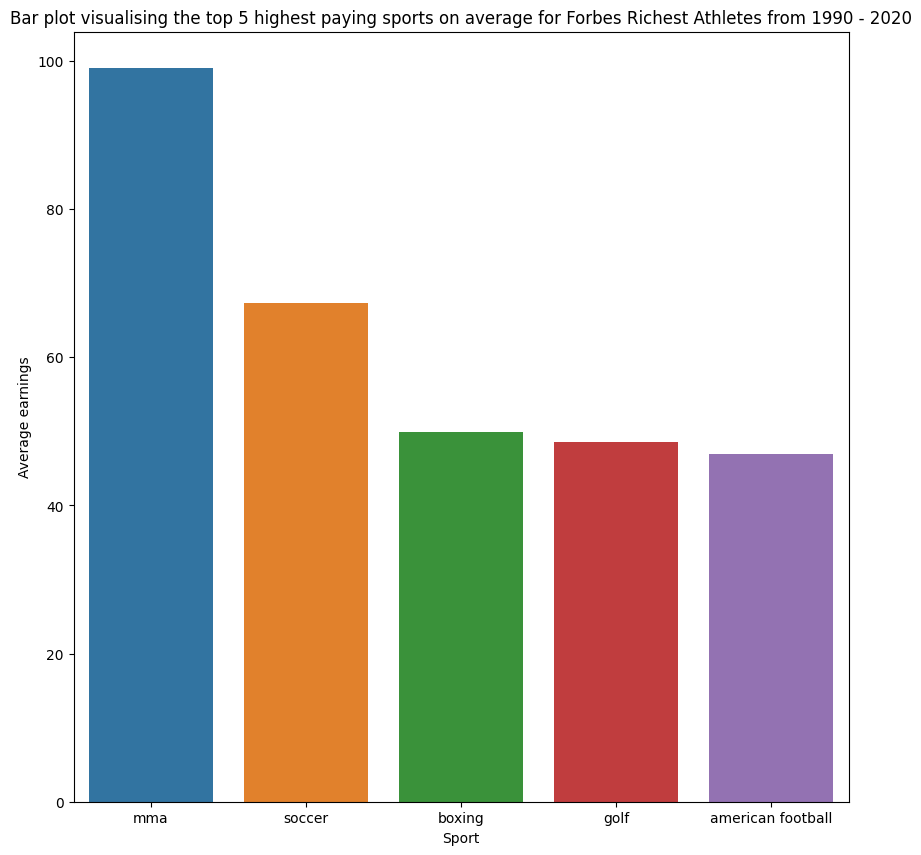

In [41]:
# Visualise the provinces with the top 5 highest points 
plt.figure(figsize=(10,10))
plt.title("Bar plot visualising the top 5 highest paying sports on average for Forbes Richest Athletes from 1990 - 2020")

sns.barplot(data=sport_earnings_df.head(5), x="Sport", y="Average earnings")

plt.show()

In [42]:
# MMA is the sport with the highest average earnings 

In [43]:
# 4. Which year had the highest earnings to be an athlete? 

groupby_year = athletes_df.groupby(by=['Year'])

year_earnings_avg = round(groupby_year.mean(numeric_only=True), 2)

year_earnings_avg.drop(columns=['S.NO', 'Current Rank'], inplace=True)

year_earnings_avg_series = year_earnings_avg['earnings ($ million)']

# Create a dataframe from the data 
year_earnings_df =  pd.DataFrame({"Year": year_earnings_avg_series.index, "Average earnings": year_earnings_avg_series.values})


In [44]:
year_earnings_df 

,Year,Average earnings
0,1990,12.80
1,1991,18.35
2,1992,15.87
3,1993,17.83
4,1994,14.89
5,1995,22.96
6,1996,27.31
7,1997,33.81
8,1998,28.14
9,1999,35.75


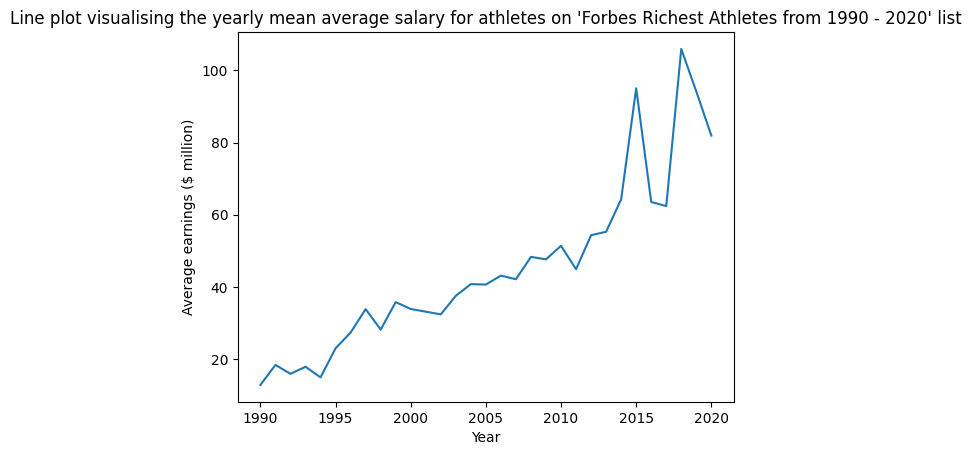

In [45]:
# Visualise the provinces with the top 5 highest points 
# plt.figure(figsize=(10,10))
plt.title("Line plot visualising the yearly mean average salary for athletes on 'Forbes Richest Athletes from 1990 - 2020' list")

plt.ylabel("Average earnings ($ million)")
sns.lineplot(data=year_earnings_df , x="Year", y="Average earnings")

plt.show()



In [46]:
# The above visualisation shows that the average earnings for the richest athletes 
# generally increased over the 20 year period but there were some significant spikes in 2015 and 2018, 
# that appear to be above the general trend

In [66]:
sorted_max_earnings[sorted_max_earnings["Year"] == 2018]

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
271,272,Floyd Mayweather,USA,1,boxing,2018,285.0
272,273,Lionel Messi,Argentina,2,soccer,2018,111.0
273,274,Cristiano Ronaldo,Portugal,3,soccer,2018,108.0
274,275,Conor McGregor,Ireland,4,mma,2018,99.0
275,276,Neymar,Brazil,5,soccer,2018,90.0
276,277,LeBron James,USA,6,basketball,2018,85.5
277,278,Roger Federer,Switzerland,7,tennis,2018,77.2
278,279,Stephen Curry,USA,8,basketball,2018,76.9
279,280,Matt Ryan,USA,9,american football,2018,67.3
280,281,Matthew Stafford,USA,10,american football,2018,59.5


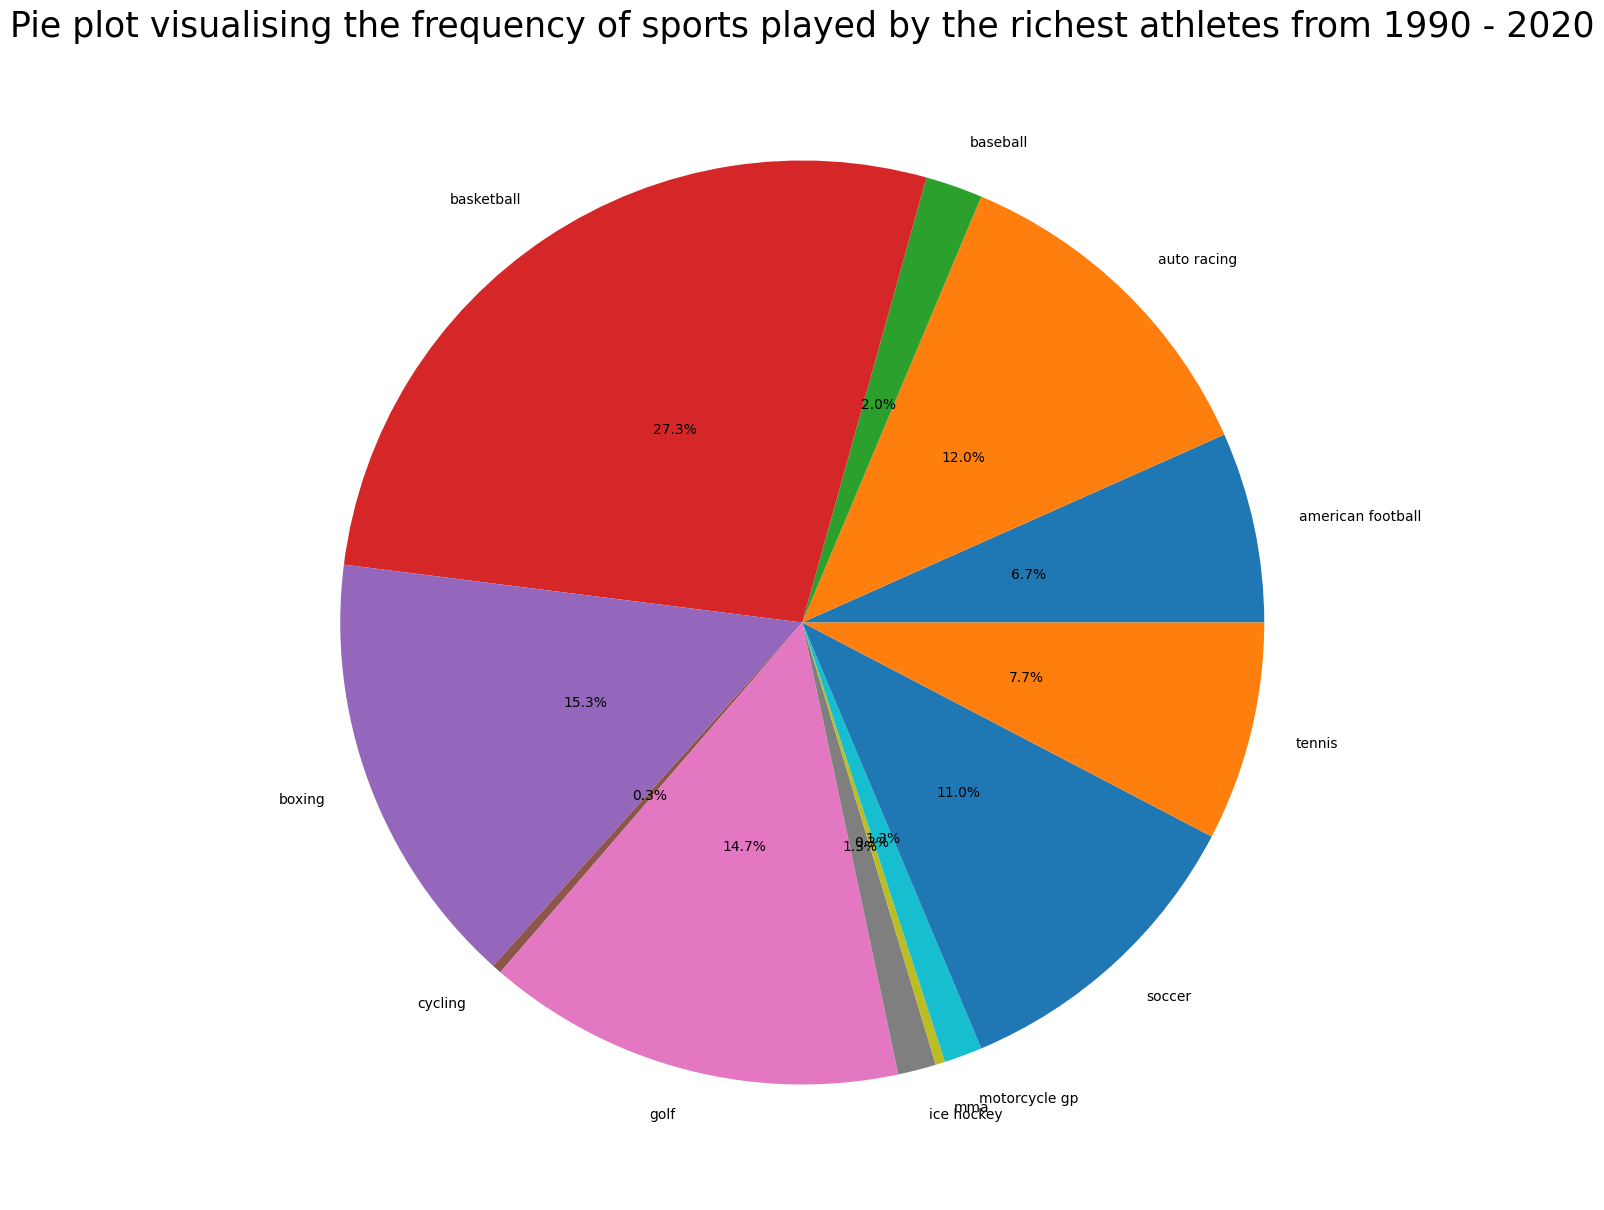

In [67]:
# 5. What is the frequency of the different sports played by the richest athletes from 1990 - 2020? 


sport_df = groupby_sport.count()

# Isolate just 1 column from dataframe and create a series 
sport_series = sport_df [sport_df .columns[1]]

sport_series

# Create pie chart
pie, ax = plt.subplots(figsize=[15,15])
labels = sport_series.keys()
plt.pie(x=sport_series, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Pie plot visualising the frequency of sports played by the richest athletes from 1990 - 2020", fontsize=25);

In [56]:
sport_series

Sport
american football    20
auto racing          36
baseball              6
basketball           82
boxing               46
cycling               1
golf                 44
ice hockey            4
mma                   1
motorcycle gp         4
soccer               33
tennis               23
Name: Name, dtype: int64

In [57]:
# The highest percentage of the richest athletes from 1990 - 2020 were basketball players 

In [61]:
# Create a histogram multigrid plot comparing earnings for the each of the sports 

# The above visualisation shows that some sports had very few athletes. 
sorted_sports = sport_series.sort_values(ascending=False)

sorted_sports

Sport
basketball           82
boxing               46
golf                 44
auto racing          36
soccer               33
tennis               23
american football    20
baseball              6
ice hockey            4
motorcycle gp         4
cycling               1
mma                   1
Name: Name, dtype: int64

In [62]:
# The sports with the top 5 frequencies of athletes are:
sorted_sports.head(5)

Sport
basketball     82
boxing         46
golf           44
auto racing    36
soccer         33
Name: Name, dtype: int64

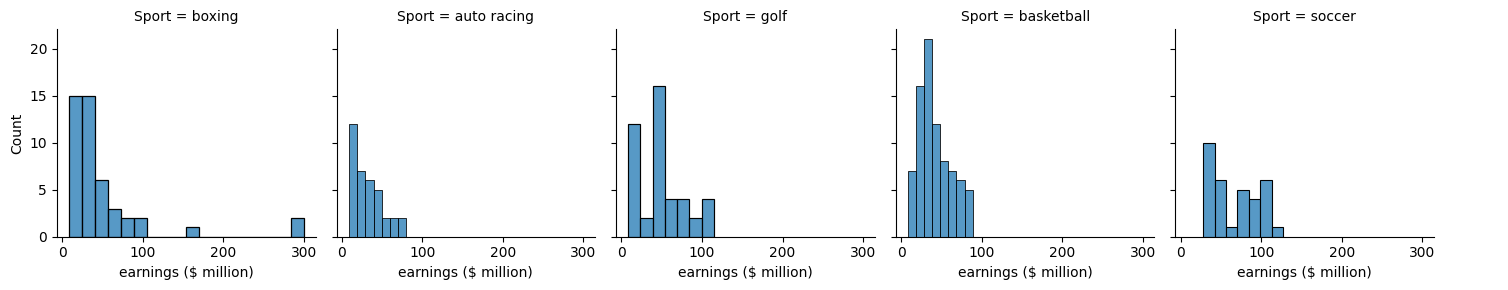

In [63]:
sport_filtered_df = athletes_df[(athletes_df['Sport'] == 'basketball') | (athletes_df['Sport'] == 'boxing') | (athletes_df['Sport'] == 'golf') | (athletes_df['Sport'] == 'auto racing') | (athletes_df['Sport'] == 'soccer')]

fg = sns.FacetGrid(sport_filtered_df, col="Sport", margin_titles=True)

fg.map(sns.histplot, 'earnings ($ million)')

fg.add_legend()
plt.show()

In [64]:
# The above visualisation shows that boxing has a slightly greater range of earnings as an athlete.
# Basketball players follow more of a classic normal distribution